<a href="https://colab.research.google.com/github/Shashiawari/Text-Analysis-using-transformers-/blob/main/Text_Analysis_Using_Transformers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/My Drive/
! ls

/content/drive/My Drive
 030413.hill.think.and.grow.rich.pdf			     result
'Adam Oh - Trapped In My Mind ( ).mp3'			     results
'ai m [Autosaved] (1).pptx'				     runs
'ai m.gslides'						     Screenshot_20230620_162010_Chrome.jpg
'ai m.pptx'						    'Selena Gomez, Camilo - 999.mp3'
 archive						     sentimental
 cache_dir						     sentitrans.csv
 certifi						     sentitrans.gsheet
'Colab Notebooks'					    'Shawn Mendes - Treat You Better.mp3'
 Contacts.vcf						     spam_model
 dataset.csv						     train_model.ipynb
'Dharia - (Uh Nai Na) Sugar And Brownies.mp3'		    'twitter tweets sarcasm data set.csv'
 em2.csv						    'Untitled form (10).gform'
 em2.xlsx						    'Untitled form (11).gform'
 em.csv							    'Untitled form (1).gform'
 EmotionStress596.txt					    'Untitled form (2).gform'
 FINAL_OPTIONS.gdoc					    'Untitled form (3).gform'
 FINAL_OPTIONS.pdf					    'Untitled form (4).gform'
 GDToT							    'Untitled form (5).gform'
'HTML _ CSS_HTML _ CSS: Course Completi

In [ ]:
import pandas as pd

In [ ]:
reviews = pd.read_csv("em.csv",encoding='mac_roman')

In [ ]:
df = pd.read_csv('em.csv', error_bad_lines=False,encoding='mac_roman')


<ipython-input-47-131602303544>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('em.csv', error_bad_lines=False,encoding='mac_roman')


In [ ]:
reviews.head()

,sentiment,review2
0,-2,"Looking at how fast people change, i remind my..."
1,-2,Dimple is not abnormal Pimple too
2,-4,Made it to the hotel alive... ...and deeply c...
3,-1,UNFAITHFUL SU MTVMUSIC
4,-3,RT @Hello_Bella: When his tweets make you moan...


In [ ]:
reviews.isnull().values.any()

False

<Axes: xlabel='sentiment', ylabel='count'>

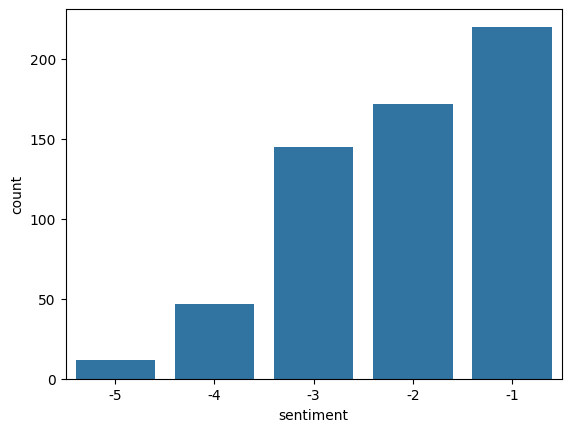

In [ ]:
import seaborn as sns
sns.countplot(x='sentiment', data=reviews)

In [ ]:
import re
import nltk
from nltk.corpus import stopwords

In [ ]:
TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    return TAG_RE.sub('', text)

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
def preprocess_text(sen):
    sentence = sen.lower()
    sentence = remove_tags(sentence)
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)
    sentence = re.sub(r'\s+', ' ', sentence)
    pattern = re.compile(r'\b(' + r'|'.join(stopwords.words('english')) + r')\b\s*')
    sentence = pattern.sub('', sentence)
    return sentence

In [ ]:
X = []
sentences = list(reviews['review2'])
for sen in sentences:
    X.append(preprocess_text(sen))

In [ ]:
!pip install transformers[torch] pandas datasets pyarrow scikit-learn

In [ ]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
def process_data(row):
    text = row['review2']
    text = str(text)
    text = ' '.join(text.split())
    label=abs(int(row["sentiment"]))
      # Convert label to integer

    encodings = tokenizer(text, padding="max_length", truncation=True, max_length=128)

    # Use 'labels' key instead of 'label' for PyTorch compatibility
    encodings['labels'] = label
    encodings['text'] = text

    return encodings


In [ ]:
print(process_data({
    'review2': 'this is a sample review of a movie.',
    'sentiment': '-5'
}))

{'input_ids': [101, 2023, 2003, 1037, 7099, 3319, 1997, 1037, 3185, 1012, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
processed_data = []

for i in range(len(reviews[:400])):
    processed_data.append(process_data(reviews.iloc[i]))

In [ ]:
from sklearn.model_selection import train_test_split

new_df = pd.DataFrame(processed_data)

train_df, valid_df = train_test_split(
    new_df,
    test_size=0.3,
    random_state=2022
)

In [ ]:
import pyarrow as pa
from datasets import Dataset

train_hg = Dataset.from_pandas(train_df[['input_ids', 'attention_mask', 'labels', 'text']])
valid_hg = Dataset.from_pandas(valid_df[['input_ids', 'attention_mask', 'labels', 'text']])


In [ ]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained(
    'bert-base-uncased',
    num_labels=6
)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(
    output_dir="./output",
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir="./logs",
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_hg,
    eval_dataset=valid_hg,
    tokenizer=tokenizer,

)

In [ ]:
trainer.train()

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Step,Training Loss


TrainOutput(global_step=105, training_loss=1.5779542468843006, metrics={'train_runtime': 23.5997, 'train_samples_per_second': 35.594, 'train_steps_per_second': 4.449, 'total_flos': 55255306014720.0, 'train_loss': 1.5779542468843006, 'epoch': 3.0})

In [ ]:
trainer.evaluate()

{'eval_loss': 1.4383832216262817,
 'eval_runtime': 0.8795,
 'eval_samples_per_second': 136.446,
 'eval_steps_per_second': 17.056,
 'epoch': 3.0}

In [ ]:
model.save_pretrained('./model/')

In [ ]:
import torch
from transformers import AutoModelForSequenceClassification

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

new_model = AutoModelForSequenceClassification.from_pretrained('./model/').to(device)

In [ ]:
from transformers import AutoTokenizer

new_tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

In [ ]:
import torch
import numpy as np

def get_prediction(text):
    encoding = new_tokenizer(text, return_tensors="pt", padding="max_length", truncation=True, max_length=128)
    encoding = {k: v.to(trainer.model.device) for k,v in encoding.items()}

    outputs = new_model(**encoding)

    logits = outputs.logits
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    sigmoid = torch.nn.Sigmoid()
    print(sigmoid)
    probs = sigmoid(logits.squeeze().cpu())
    probs = probs.detach().numpy()
    label = np.argmax(probs, axis=-1)
    print(label)
    if label == 1:

        return {
            'sentiment': "-1",
            'probability': probs[1]
        }
    elif label == 2:
        return {
            'sentiment': "-2",
            'probability': probs[2]
      }
    elif label == 3:
        label=label*100
        return {
            'sentiment': "-3",
            'probability': probs[3]
      }
    elif label == 4:
        label=label*100
        return {
            'sentiment':"-4",
            'probability': probs[4]
      }
    elif label == 5:
        label=label*100
        return {
            'sentiment': "-5",
            'probability': probs[5]
      }

    else:
       pass


In [ ]:
train_df, test_df = train_test_split(df, test_size=0.3, random_state=42)

In [ ]:
from transformers import RobertaTokenizer, RobertaForSequenceClassification
from torch.utils.data import DataLoader, TensorDataset
import torch
from sklearn.metrics import accuracy_score, classification_report


test_texts = test_df['review2'].tolist()

test_encodings = tokenizer(test_texts, truncation=True, padding=True, return_tensors='pt')

test_labels_tensor = torch.tensor(abs(test_df['sentiment']).tolist(), dtype=torch.long)

test_dataset = TensorDataset(test_encodings['input_ids'], test_encodings['attention_mask'], test_labels_tensor)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

model.eval()

all_predictions = []
all_true_labels = []

for batch in test_loader:
    input_ids, attention_mask, labels = batch
    with torch.no_grad():
        outputs = model(input_ids, attention_mask=attention_mask)

    logits = outputs.logits
    predictions = torch.argmax(logits, dim=1).tolist()

    all_predictions.extend(predictions)
    all_true_labels.extend(labels.tolist())

accuracy = accuracy_score(all_true_labels, all_predictions)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(all_true_labels, all_predictions))


Accuracy: 0.35
Classification Report:
              precision    recall  f1-score   support

           1       0.35      1.00      0.51        62
           2       0.00      0.00      0.00        48
           3       0.00      0.00      0.00        50
           4       0.00      0.00      0.00        15
           5       0.00      0.00      0.00         4

    accuracy                           0.35       179
   macro avg       0.07      0.20      0.10       179
weighted avg       0.12      0.35      0.18       179



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
get_prediction('wonderfull')

Sigmoid()
1


{'sentiment': '-1', 'probability': 0.71410835}